In [15]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils as util
from construct_model_matrices import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [2]:
!ls ../../data/Xy_year_split_data/

X_test_1996.csv  X_train_2009.csv y_test_1996.csv  y_train_2009.csv
X_test_1997.csv  X_valid_1998.csv y_test_1997.csv  y_valid_1998.csv
X_train_2000.csv X_valid_1999.csv y_train_2000.csv y_valid_1999.csv


In [3]:
DATA_DIR = '../../data/Xy_year_split_data'

In [4]:
SQUARE = [
    'lon', 'lat', 'etopo1', 'JanTmin', 'MarTmin', 'TMarAug', 'summerTmean',
    'AugTmean', 'AugTmax', 'GSP', 'PMarAug', 'summerP0', 'OctTmin', 
    'fallTmean', 'winterTmin', 'Tmin', 'Tmean', 'Tvar', 'TOctSep', 
    'summerP1', 'summerP2', 'Pmean', 'POctSep', 'PcumOctSep', 'PPT', 
    'ddAugJul', 'ddAugJun']
CUBE = ['etopo1', 'summerP0', 'summerP1', 'summerP2', 'Pmean', 'POctSep',
        'GSP', 'PMarAug']
INTERACTIONS = [
    'lon:summerTmean', 'lon:AugTmean', 'lon:AugTmax', 'lon:GSP', 
    'lon:PMarAug', 'lon:Pmean', 'lon:POctSep', 'lon:PcumOctSep', 'lon:PPT',
    'lat:etopo1', 'lat:JanTmin', 'lat:MarTmin', 'lat:TMarAug', 
    'lat:summerTmean', 'lat:AugTmean', 'lat:AugTmax', 'lat:GSP', 
    'lat:PMarAug', 'lat:summerP0', 'lat:fallTmean', 'lat:winterTmin', 
    'lat:Tmin', 'lat:Tmean', 'lat:TOctSep', 'lat:summerP2', 'lat:Pmean', 
    'lat:POctSep', 'lat:PcumOctSep', 'lat:PPT', 'lat:ddAugJul', 
    'lat:ddAugJun', 'etopo1:MarTmin', 'etopo1:winterTmin', 'etopo1:Tmean',
    'etopo1:TOctSep', 'etopo1:Pmean', 'etopo1:PcumOctSep', 
    'JanTmin:MarTmin', 'JanTmin:TMarAug', 'JanTmin:summerP0', 
    'JanTmin:fallTmean', 'JanTmin:winterTmin', 'JanTmin:Tmin', 
    'JanTmin:Tmean', 'JanTmin:Tvar', 'JanTmin:TOctSep', 'JanTmin:summerP2',
    'JanTmin:Pmean', 'JanTmin:POctSep', 'JanTmin:PcumOctSep', 'JanTmin:PPT',
    'MarTmin:TMarAug', 'MarTmin:AugTmax', 'MarTmin:summerP0', 
    'MarTmin:fallTmean', 'MarTmin:winterTmin', 'MarTmin:Tmin', 
    'MarTmin:Tmean', 'MarTmin:Tvar', 'MarTmin:TOctSep', 'MarTmin:summerP2', 
    'TMarAug:AugTmean', 'TMarAug:AugTmax', 'TMarAug:summerP0', 
    'TMarAug:fallTmean', 'TMarAug:winterTmin', 'TMarAug:Tmin', 
    'TMarAug:Tmean', 'TMarAug:TOctSep', 'TMarAug:summerP2', 
    'AugTmean:Tmean','AugTmean:TOctSep', 'AugTmax:GSP', 'AugTmax:PMarAug',
    'AugTmax:summerP0', 'AugTmax:fallTmean', 'AugTmax:Tmean', 
    'AugTmax:TOctSep', 'AugTmax:summerP2', 'AugTmax:Pmean', 
    'AugTmax:POctSep', 'AugTmax:PcumOctSep', 'AugTmax:PPT', 'GSP:PMarAug',
    'GSP:Tvar', 'GSP:Pmean', 'GSP:POctSep', 'GSP:PcumOctSep', 'GSP:PPT',
    'PMarAug:summerP2', 'PMarAug:Pmean', 'PMarAug:POctSep',
    'PMarAug:PcumOctSep', 'PMarAug:PPT', 'summerP0:fallTmean', 
    'summerP0:winterTmin', 'summerP0:Tmin', 'summerP0:Tmean', 
    'summerP0:TOctSep', 'summerP0:summerP2', 'fallTmean:winterTmin', 
    'fallTmean:Tmin', 'fallTmean:Tmean', 'fallTmean:TOctSep',
    'fallTmean:summerP2', 'winterTmin:Tmin', 'winterTmin:Tmean', 
    'winterTmin:Tvar', 'winterTmin:TOctSep', 'winterTmin:summerP2',
    'winterTmin:POctSep', 'winterTmin:PcumOctSep', 'winterTmin:PPT', 
    'Tmin:Tmean', 'Tmin:Tvar', 'Tmin:TOctSep', 'Tmin:summerP2', 
    'Tmin:POctSep', 'Tmin:PPT', 'Tmean:Tvar', 'Tmean:TOctSep', 
    'Tmean:summerP2', 'Tvar:TOctSep', 'Tvar:Pmean', 'Tvar:POctSep', 
    'Tvar:PcumOctSep', 'Tvar:PPT', 'TOctSep:summerP2', 'summerP1:Pmean', 
    'summerP1:POctSep', 'summerP1:PcumOctSep', 'summerP1:PPT', 
    'summerP2:Pmean', 'summerP2:PcumOctSep', 'Pmean:POctSep', 
    'Pmean:PcumOctSep', 'Pmean:PPT', 'POctSep:PcumOctSep', 'POctSep:PPT',
    'PcumOctSep:PPT', 'lat:lon', 'lat:lon:sum9_t1', 'lat:lon:sum9_t2',
    'lat:lon:sum9_t3', 'lat:lon:sum9_t4', 'lat:lon:sum9_t5'] 

DROPS = ['density']

In [5]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR)
matrix_constructor.set_squares(SQUARE)
matrix_constructor.set_cubes(CUBE)
matrix_constructor.set_interactions(INTERACTIONS)
#matrix_constructor.set_drop_columns(DROPS)
data_sets = matrix_constructor.construct_model_matrices()

Train:
  ['X_train_2000.csv', 'X_train_2009.csv'] 
  ['y_train_2000.csv', 'y_train_2009.csv']
Valid:
  ['X_valid_1998.csv', 'X_valid_1999.csv'] 
  ['y_valid_1998.csv', 'y_valid_1999.csv']
Test:
  ['X_test_1996.csv', 'X_test_1997.csv'] 
  ['y_test_1996.csv', 'y_test_1997.csv']
Loading data from ['X_train_2000.csv', 'X_train_2009.csv']...
Loading data from ['X_valid_1998.csv', 'X_valid_1999.csv']...
Loading data from ['X_test_1996.csv', 'X_test_1997.csv']...
Loading data from ['y_train_2000.csv', 'y_train_2009.csv']...
Loading data from ['y_valid_1998.csv', 'y_valid_1999.csv']...
Loading data from ['y_test_1996.csv', 'y_test_1997.csv']...
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Adding quadratic terms...
Adding cubic terms...
Adding interactions...


In [6]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [7]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)

Train:
 X: (110164, 222)
 y: (110164, 1)
Valid:
 X: (110164, 222)
 y: (110164, 1)
Test:
 X: (110164, 222)
 y: (110164, 1)


In [8]:
#print('NAs:')
#for field in list(X_train):
#    n_na = sum(np.isnan(X_train[field]))
#    if n_na:
#        print('%s:\t%d' % (field, n_na))

In [9]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 18.15%
Percent presence in y_valid: 11.61%
Percent presence in y_test: 9.90%


In [18]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 18.15)
print('  valid:', 100 - 11.61)
print('  test: ', 100 -  9.90)

Baseline accuracy if predicting "absent" for all cells:
  train: 81.85
  valid: 88.39
  test:  90.1


In [13]:
btl_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year == 1996, :], 'btl_t1', cell_dim=10000)

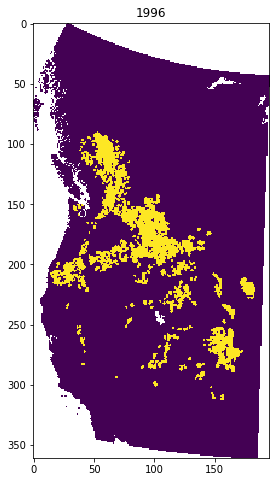

In [17]:
imshow(np.rot90(btl_matrix_test));
plt.title('1996');

In [12]:
full_train = X_train.copy()
full_valid = X_valid.copy()
full_test = X_test.copy()

full_train['btl_t'] = y_train['btl_t']
full_valid['btl_t'] = y_valid['btl_t']
full_test['btl_t'] = y_test['btl_t']

In [13]:
drop = ['x', 'y', 'year']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [14]:
predictors = list(X_train)

In [15]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [16]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [17]:
y_train = y_train['btl_t'].values.reshape(-1)
y_valid = y_valid['btl_t'].values.reshape(-1)
y_test  = y_test['btl_t'].values.reshape(-1)

In [18]:
# Find optimal regularization via best validation-set accuracy
def optimize_regularization_parameter(
    mn, mx, steps, X_train, y_train, X_valid, y_valid):
    l1_mods = []
    l2_mods = []
    Cs = np.logspace(mn, mx, steps)    
    t0 = time.time()
    for C in Cs:
        print('Testing C =', C)
        for penalty in ['l1', 'l2']:
            print('  %s:' % penalty, end=' ')
            logistic_clf = LogisticRegression(
                C=C, penalty=penalty, n_jobs=-1)
            logistic_clf.fit(X_train, y_train)
            preds = logistic_clf.predict(X_valid)
            accuracy = sum(y_valid == preds) / len(preds)
            print(round(accuracy, 4))
            if penalty == 'l1':
                l1_mods.append(accuracy)
            else:
                l2_mods.append(accuracy)
            print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))
    return Cs, l1_mods, l2_mods

In [19]:
Cs, l1_mods, l2_mods = optimize_regularization_parameter(
    -4, -1, 5, X_train, y_train, X_valid, y_valid)

Testing C = 0.0001
  l1: 0.936
Elapsed time: 0.04 minutes
  l2: 0.9286
Elapsed time: 0.10 minutes
Testing C = 0.00056234132519
  l1: 0.9357
Elapsed time: 0.14 minutes
  l2: 0.9313
Elapsed time: 0.23 minutes
Testing C = 0.00316227766017
  l1: 0.934
Elapsed time: 0.28 minutes
  l2: 0.9254
Elapsed time: 0.39 minutes
Testing C = 0.0177827941004
  l1: 0.9267
Elapsed time: 0.60 minutes
  l2: 0.9168
Elapsed time: 0.78 minutes
Testing C = 0.1
  l1: 0.9127
Elapsed time: 2.19 minutes
  l2: 0.913
Elapsed time: 2.43 minutes


In [23]:
def plot_C_curves(Cs, l1_mods, l2_mods):
    plt.plot(Cs, l1_mods, label='L1 Reg.');
    plt.plot(Cs, l2_mods, label='L2 Reg.');
    plt.xscale('log');
    plt.xlabel('C');
    plt.ylabel('Accuracy');
    plt.legend(loc='best');

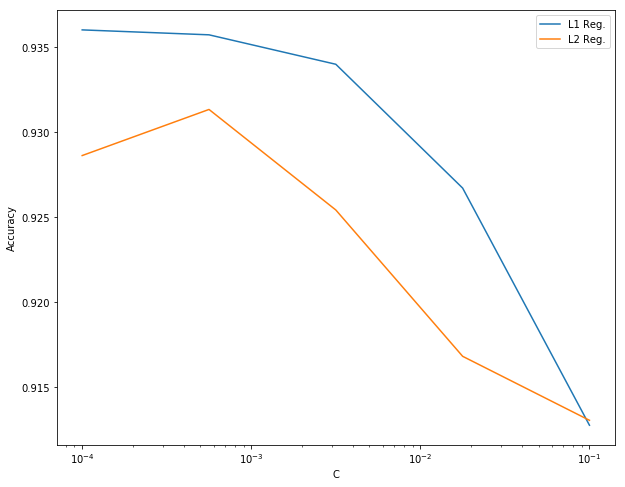

In [24]:
plot_C_curves(Cs, l1_mods, l2_mods)

Testing C = 1e-05
  l1: 0.8839
Elapsed time: 0.02 minutes
  l2: 0.8979
Elapsed time: 0.07 minutes
Testing C = 5.6234132519e-05
  l1: 0.9353
Elapsed time: 0.11 minutes
  l2: 0.9242
Elapsed time: 0.18 minutes
Testing C = 0.000316227766017
  l1: 0.9363
Elapsed time: 0.21 minutes
  l2: 0.9317
Elapsed time: 0.29 minutes
Testing C = 0.00177827941004
  l1: 0.9351
Elapsed time: 0.36 minutes
  l2: 0.928
Elapsed time: 0.48 minutes
Testing C = 0.01
  l1: 0.9296
Elapsed time: 0.61 minutes
  l2: 0.9197
Elapsed time: 0.77 minutes


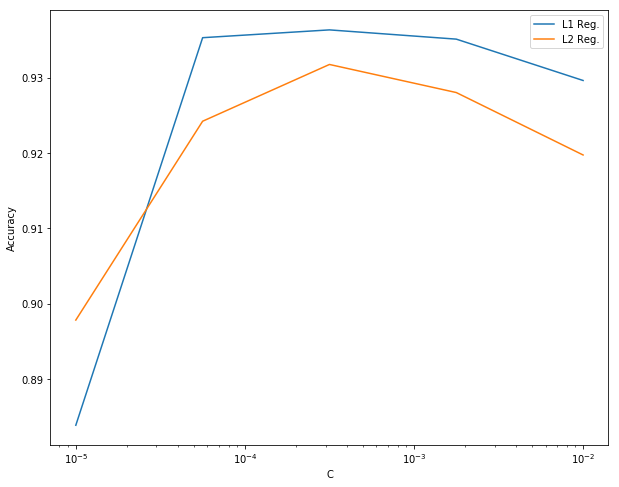

In [25]:
Cs, l1_mods, l2_mods = optimize_regularization_parameter(
    -5, -2, 5, X_train, y_train, X_valid, y_valid)
plot_C_curves(Cs, l1_mods, l2_mods)

Testing C = 3.16227766017e-05
  l1: 0.9179
Elapsed time: 0.03 minutes
  l2: 0.9171
Elapsed time: 0.08 minutes
Testing C = 7.49894209332e-05
  l1: 0.9357
Elapsed time: 0.12 minutes
  l2: 0.9268
Elapsed time: 0.18 minutes
Testing C = 0.000177827941004
  l1: 0.9364
Elapsed time: 0.22 minutes
  l2: 0.9308
Elapsed time: 0.28 minutes
Testing C = 0.000421696503429
  l1: 0.9359
Elapsed time: 0.33 minutes
  l2: 0.9317
Elapsed time: 0.41 minutes
Testing C = 0.001
  l1: 0.935
Elapsed time: 0.45 minutes
  l2: 0.9301
Elapsed time: 0.54 minutes


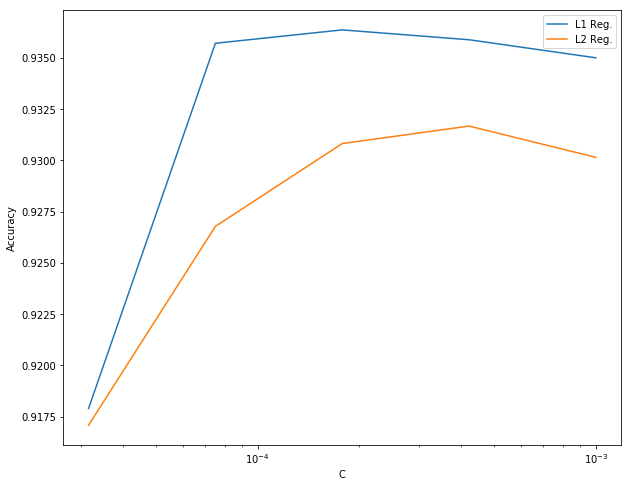

In [26]:
Cs, l1_mods, l2_mods = optimize_regularization_parameter(
    -4.5, -3, 5, X_train, y_train, X_valid, y_valid)
plot_C_curves(Cs, l1_mods, l2_mods)

Testing C = 0.0001
  l1: 0.936
Elapsed time: 0.04 minutes
  l2: 0.9286
Elapsed time: 0.10 minutes
Testing C = 0.000133352143216
  l1: 0.9363
Elapsed time: 0.14 minutes
  l2: 0.9302
Elapsed time: 0.20 minutes
Testing C = 0.000177827941004
  l1: 0.9364
Elapsed time: 0.24 minutes
  l2: 0.9308
Elapsed time: 0.30 minutes
Testing C = 0.000237137370566
  l1: 0.9363
Elapsed time: 0.34 minutes
  l2: 0.9314
Elapsed time: 0.41 minutes
Testing C = 0.000316227766017
  l1: 0.9363
Elapsed time: 0.45 minutes
  l2: 0.9317
Elapsed time: 0.53 minutes


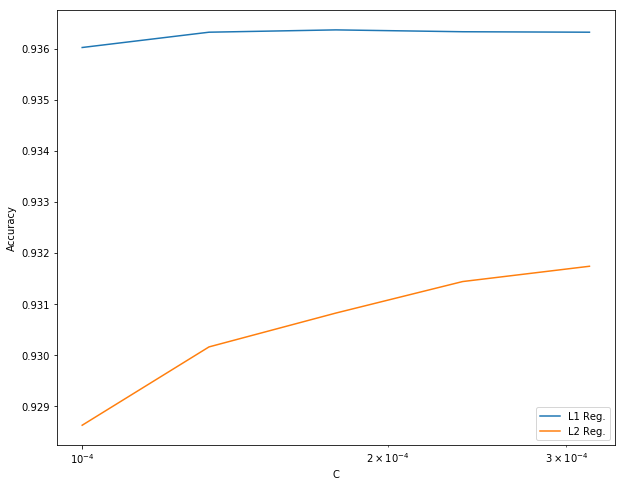

In [27]:
Cs, l1_mods, l2_mods = optimize_regularization_parameter(
    -4, -3.5, 5, X_train, y_train, X_valid, y_valid)
plot_C_curves(Cs, l1_mods, l2_mods)

In [28]:
[(c, acc) for c, acc in zip(Cs, l1_mods)]

[(0.0001, 0.93602265712937072),
 (0.0001333521432163324, 0.93632221052249376),
 (0.00017782794100389227, 0.93636759740023967),
 (0.00023713737056616554, 0.93633128789804287),
 (0.00031622776601683794, 0.93632221052249376)]

In [29]:
best_C = 0.00017782794100389227

In [30]:
logistic_clf = LogisticRegression(C=best_C, penalty='l1')
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.93725718020405935